# Introduction

### Objective:
        Pinpoint any impact of external factors on rides (i.e. weather on ride frequencies).
    
###  Goals:
        Transform the raw data into clean data
        Explore November 2017's rides data that could analyze any influences on rides
    
### Initial Questions:
        Is rain a clear, evident factor that influences the amount of rides on a particular day?
        Which areas tend to have the most drop-offs in Chicago?
        Which top 3 taxi companies dominates the Chicago area?

# Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st
import pandas as pd

# Datasets

In [2]:
#Taxi Companies = Taxi Co
taxi_co = pd.read_csv('/datasets/project_sql_result_01.csv')

#Chicago rides = C_rides
c_rides = pd.read_csv('/datasets/project_sql_result_04.csv')

#Weather Info 
wdf = pd.read_csv('/datasets/project_sql_result_07.csv')

# Data Wrangling - Fix & Enrich

# Chicago Rides

In [3]:
c_rides.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [4]:
print(c_rides.dtypes)

dropoff_location_name     object
average_trips            float64
dtype: object


In [5]:
c_rides['dropoff_location_name'] = c_rides['dropoff_location_name'].astype(str)
c_rides['dropoff_location_name']

0                Loop
1         River North
2       Streeterville
3           West Loop
4              O'Hare
           ...       
89    Mount Greenwood
90          Hegewisch
91           Burnside
92          East Side
93          Riverdale
Name: dropoff_location_name, Length: 94, dtype: object

In [6]:
c_rides.sample(10)

,dropoff_location_name,average_trips
57,Hermosa,27.566667
88,Undef,3.800000
23,Rogers Park,299.033333
2,Streeterville,6664.666667
50,South Shore,40.533333
5,Lake View,2420.966667
27,Avondale,208.233333
9,Sheffield & DePaul,1259.766667
3,West Loop,5163.666667
34,Humboldt Park,97.866667


In [7]:
print(c_rides.dtypes)

dropoff_location_name     object
average_trips            float64
dtype: object


# Taxi Companies

In [8]:
taxi_co.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [9]:
print(taxi_co.dtypes)

company_name    object
trips_amount     int64
dtype: object


In [10]:
taxi_co['company_name'] = taxi_co['company_name'].astype(str)
taxi_co['company_name']

0                           Flash Cab
1           Taxi Affiliation Services
2                   Medallion Leasing
3                          Yellow Cab
4     Taxi Affiliation Service Yellow
                   ...               
59       4053 - 40193 Adwar H. Nikola
60            2733 - 74600 Benny Jona
61      5874 - 73628 Sergey Cab Corp.
62         2241 - 44667 - Felman Corp
63        3556 - 36214 RC Andrews Cab
Name: company_name, Length: 64, dtype: object

In [11]:
taxi_co.sample(10)

,company_name,trips_amount
61,5874 - 73628 Sergey Cab Corp.,5
13,Nova Taxi Affiliation Llc,3175
24,Chicago Taxicab,1014
43,2809 - 95474 C & D Cab Co Inc.,29
47,4615 - 83503 Tyrone Henderson,21
49,5074 - 54002 Ahzmi Inc,16
25,Top Cab Affiliation,978
57,Metro Group,11
4,Taxi Affiliation Service Yellow,9299
42,1085 - 72312 N and W Cab Co,29


In [12]:
print(taxi_co.dtypes)

company_name    object
trips_amount     int64
dtype: object


# Weather Data

In [13]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
wdf.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
wdf.nunique()

start_ts               81
weather_conditions      2
duration_seconds      495
dtype: int64

In [16]:
wdf.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

# Now that the data wrangling process is completed, we can began exploring some inital questions and tackle our last goal that was stated in the beginning.

# EDA / SDA

## Chicago rides

### Which 10 areas tend to have the most drop-offs in Chicago?

It seems like the Loop has the most with at least an average in 10k trips but the double digit average drasticially drops off to  the smaller end, after the West Loop, with O'Hare Airport with at least about 2,500 trips.

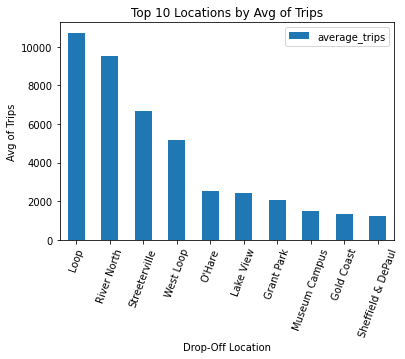

In [17]:
dropoff = c_rides.sort_values(by='average_trips', ascending=False)
top_dropoff = dropoff.head(10)

top_dropoff.plot(x = 'dropoff_location_name', y = 'average_trips', kind = 'bar')
plt.xlabel('Drop-Off Location')
plt.ylabel('Avg of Trips')
plt.title('Top 10 Locations by Avg of Trips')
plt.xticks(rotation=70)
plt.show()

In [18]:
top_dropoff = dropoff.head(10)
top_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Taxi Companies

### Which top 3 taxi companies dominate the Chicago area?

Flash Cab is reigning superior with at least 19.5k trips,
2nd is Taxi Affiliation Services with at least 11.4k and,
3rd is Medallion Leasing with at least 10.3k trips.

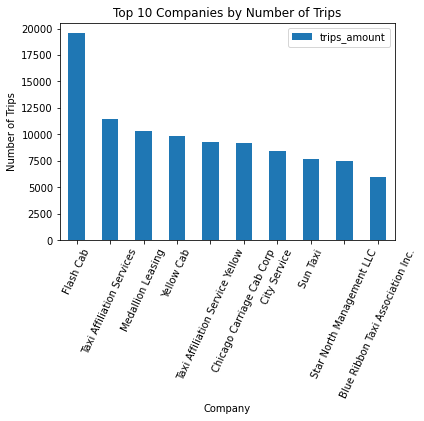

In [19]:
companies = taxi_co.sort_values(by='trips_amount', ascending=False)
top_co = companies.head(10)

top_co.plot(x = 'company_name', y = 'trips_amount', kind = 'bar')
plt.xlabel('Company')
plt.ylabel('Number of Trips')
plt.title('Top 10 Companies by Number of Trips')
plt.xticks(rotation=65)
plt.show()

In [20]:
top_co = companies.head(10)
top_co

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


## Test the Hypothesis

### Is rain a clear, evident factor that influences the amount of rides on a particular day?

The weather dataframe is all the **rides for every Saturday (4th, 11th, 18th & the 25th) in November 2017 going from the Loop to the O'Hare Airport.**

In [21]:
wdf.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [22]:
weather = wdf.groupby('weather_conditions').count()
weather

,start_ts,duration_seconds
weather_conditions,,
Bad,180,180
Good,888,888


Futhermore, there is a clear **total count** difference (about at least a 700 difference, skewed in favor of the good weather category) in the number of rides occuring due to the weather conditions on the Saturdays in November. 

This goes to show that we should further analyze whether or not if there's a clear correlation by testing a hypothesis based on the weather conditions vs the ride durations.

In [23]:
w_time = wdf.groupby('weather_conditions')['duration_seconds'].mean()
w_time

#w_time2 = wdf['duration_seconds'].mean()
#w_time2

weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

Supposedly the mean difference between both weather conditions is 428 seconds, in other words more or less about a 7 mins difference....that's a skewed impression given our prior insight. So let's focus on our hypothesis, as this will give us a clear answer on whether or not the weather conditions play a factor in the ride durations, at all

Here we have our hypothesis: the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

Here's how I have stated the null and alternative statements, respectively:

* I will denote the H₀ where the average time of rides are _**indicating no difference**_ on rainy & non-rainy Saturdays from the Loop to O'Hare
* I will denote the H₁ where the average time of rides are _**indicating a difference**_ on rainy & non-rainy Saturdays from the Loop to O'Hare

Futhermore, we shall consider **the mean of a statistical population is greater (or less than) a certain value** approach when testing.

In [24]:
rainy_saturdays = wdf[wdf['weather_conditions'] =='Bad']['duration_seconds']
no_rain_saturdays = wdf[wdf['weather_conditions'] =='Good']['duration_seconds']

alpha = 0.05
results = st.ttest_ind(rainy_saturdays, no_rain_saturdays)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


This is quite the _expected(?)_ outcome given the skewdness leaning in favor of the days (and their timeframes for the duration of the ride) with good weather where we would have to reject the idea : where the average time of rides are _**indicating no difference**_ on rainy & non-rainy Saturdays from the Loop to O'Hare.   

# Conclusion

__Overall Conclusion__

Given my earlier inqury, analysis, and mini observations: I stated that we'll explore whether or not the (rain or non-raining) weather conditions would have any potential influence on a ride's duration on the Saturdays of November. We immediately noticed a skewed factor in favor of the good weather conditions versus the bad (i.e. raining) condition; and thus, decided to use the one-tailed hypothesis approach for testing the stated hypothesis. As a result, the _null hypothesis was rejected_, implying that the weather conditions does not indicate a difference in relation to ride durations.